In [24]:
#Імпорт необхідних бібліотек
import numpy as nmp
import pandas as pnd
import matplotlib.pyplot as ppl
import seaborn as sbn
import warnings as wrn

from sklearn.datasets import make_classification as mkc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV as gsc
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import precision_score as prs
from sklearn.metrics import recall_score as rcs
from sklearn.metrics import classification_report as clr
from sklearn.metrics import confusion_matrix as cnm
from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import roc_curve as rcv
from sklearn.metrics import auc
from sklearn.metrics import f1_score as f1
from sklearn.linear_model import LogisticRegression as lgr
from sklearn.preprocessing import LabelEncoder as lbe
from sklearn.multioutput import MultiOutputClassifier as moc

Performance evaluation:
    Accuracy: 0.865
    Precision: 0.82
    Recall: 0.90
    F1-Score: 0.86
    AUC-ROC: 0.87


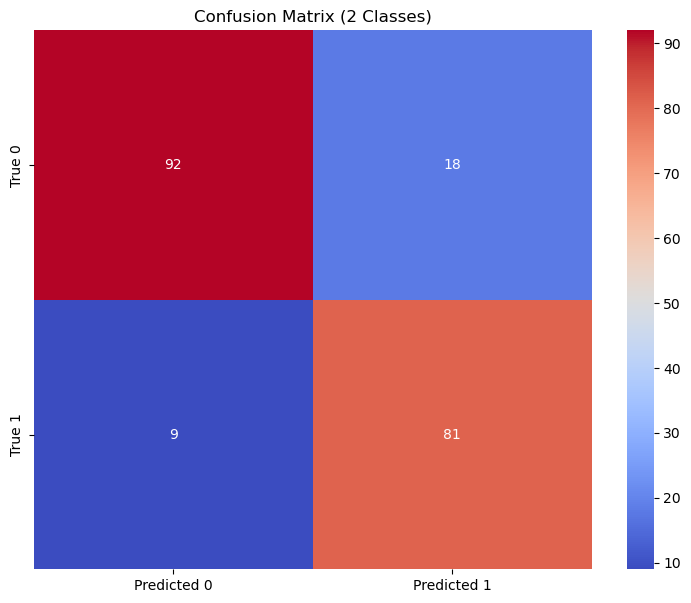

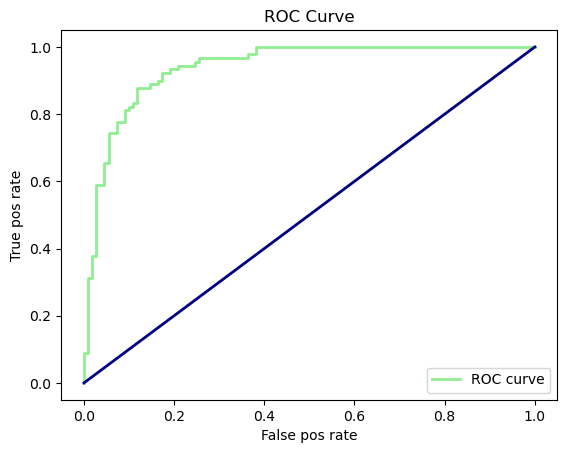

In [25]:
#Part 1
x, y = mkc(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=13)
datf = pnd.DataFrame(data=nmp.c_[x, y], columns=['Feature 1', 'Feature 2', 'Target'])
datf.to_csv('Part1_Data.csv', index=False)
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.2, random_state=3)
md = lgr()
md.fit(xtrain, ytrain)
ypred = md.predict(xtest)
print('Performance evaluation:')
print('    Accuracy:', acs(ytest, ypred))
print('    Precision: {:.2f}'.format(prs(ytest, ypred)))
print('    Recall: {:.2f}'.format(rcs(ytest, ypred)))
print('    F1-Score: {:.2f}'.format(f1(ytest, ypred)))
print('    AUC-ROC: {:.2f}'.format(ras(ytest, ypred)))
ppl.figure(figsize=(9, 7))
sbn.heatmap(cnm(ytest, ypred), annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
ppl.title('Confusion Matrix (2 Classes)')
ppl.show(close=None, block=None)
fpr, tpr, thresholds = rcv(ytest, md.predict_proba(xtest)[:,1])
rocauc = auc(fpr, tpr)
ppl.title('ROC Curve')
ppl.xlabel('False pos rate')
ppl.ylabel('True pos rate')
ppl.plot(fpr, tpr, color='lightgreen', lw=2, label='ROC curve')
ppl.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='-')
ppl.legend(loc='lower right')
ppl.show(close=None, block=None)

Performance evaluation:
    Accuracy: 0.715
    Precision: 0.73
    Recall: 0.71
    F1-Score: 0.72


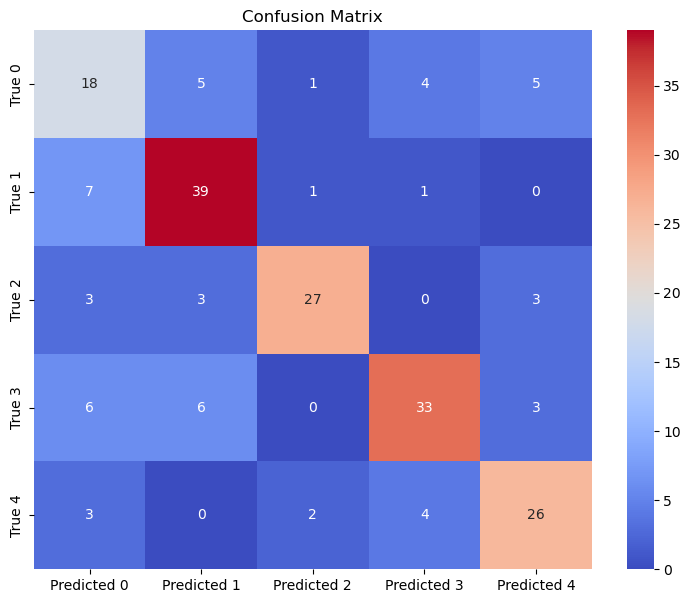

In [26]:
#Part 2
x, y = mkc(n_samples=1000, n_features=7, n_informative=4, n_classes=5, random_state=13)
dat = pnd.DataFrame(x, columns=[f"Feature {i+1}" for i in range(7)])
dat['Target'] = y
dat.to_csv('Part2_Data.csv', index=False)
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.2, random_state=3)
mdrfc = rfc(random_state=13)
mdrfc.fit(xtrain, ytrain)
ypred = mdrfc.predict(xtest)
print('Performance evaluation:')
print('    Accuracy:', acs(ytest, ypred))
print('    Precision: {:.2f}'.format(prs(ytest, ypred, average='weighted')))
print('    Recall: {:.2f}'.format(rcs(ytest, ypred, average='weighted')))
print('    F1-Score: {:.2f}'.format(f1(ytest, ypred, average='weighted')))
ppl.figure(figsize=(9, 7))
sbn.heatmap(cnm(ytest, ypred), annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'],
            yticklabels=['True 0', 'True 1', 'True 2', 'True 3', 'True 4'])
ppl.title('Confusion Matrix')
ppl.show(close=None, block=None)

In [27]:
#Part 3
wrn.filterwarnings('always')
dataf = pnd.read_csv('ConstrInvestmentAmountInJapan.csv')
labelenc = lbe()
for column in dataf.select_dtypes(include=['object']).columns:
    dataf[column] = labelenc.fit_transform(dataf[column])
dataf.fillna(dataf.mean(), inplace=True)
x = dataf[['Year', 'Architecture_Total', 'Architecture_Residential', 'Architecture_Non Residential']]
y = dataf[['Construction_Investment', 'Value']]
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.2, random_state=13)
mdl = moc(rfc(random_state=13))
mdl.fit(xtrain, ytrain)
ypred = mdl.predict(xtest)
for i in range(ytest.shape[1]):
    lbl = ytest.columns[i]
    print('Performance evaluation for {}:'.format(lbl))
    print('    Accuracy: {:.2f}'.format(acs(ytest[lbl], ypred[:, i])))
    print('    Precision: {:.2f}'.format(prs(ytest[lbl], ypred[:, i], average='weighted')))
    print('    Recall: {:.2f}'.format(rcs(ytest[lbl], ypred[:, i], average='weighted')))
    print('    F1-Score: {:.2f}'.format(f1(ytest[lbl], ypred[:, i], average='weighted')))
    print('\n')

Performance evaluation for Construction_Investment:
    Accuracy: 0.84
    Precision: 0.86
    Recall: 0.84
    F1-Score: 0.85


Performance evaluation for Value:
    Accuracy: 0.43
    Precision: 0.43
    Recall: 0.43
    F1-Score: 0.43


